# $\color{red}{\bf{Interpolation \ of \ given \ points}}$
## **1. Solve a set of linear equations**
##### For given a set of points $\large{(x_0, y_0), (x_1, y_1), (x_2, y_2), \cdots, (x_N, y_N)}$ and polynomials $P_N(x)=a_0+a_1x+a_2x^2+\cdots+a_Nx^N$, we have
$$
\large{
\left \{
\begin{aligned}
    a_0+a_1x_0+a_2x_0^2+\cdots+a_Nx_0^N &= y_0\\
    a_0+a_1x_1+a_2x_1^2+\cdots+a_Nx_1^N &= y_1\\
    a_0+a_1x_2+a_2x_2^2+\cdots+a_Nx_2^N &= y_2\\
    &\vdots\\
    a_0+a_1x_N+a_2x_N^2+\cdots+a_Nx_N^N &= y_N
\end{aligned}
\right. \tag{1.1},
}
$$
##### and we can reformulate $\large{eq. \ (1.1)}$ as
$$
\large{
\left [
\begin{matrix}
    1 & x_0 & x_0^2 & \cdots & x_0^N\\
    1 & x_1 & x_1^2 & \cdots & x_1^N\\
    1 & x_2 & x_2^2 & \cdots & x_2^N\\
    \vdots & \vdots & \vdots & \cdots & \vdots\\
    1 & x_N & x_N^2 & \cdots & x_N^N
\end{matrix}
\right ]
\left [
\begin{matrix}
    a_0\\
    a_1\\
    a_2\\
    \vdots\\
    a_N
\end{matrix}
\right ]
=
\left [
\begin{matrix}
    y_0\\
    y_1\\
    \vdots\\
    y_N
\end{matrix}
\right ] \tag{1.2}.
}
$$
##### So we need to solve the linear system of equation to find these coefficients $\large{(a_0, a_1, a_2, \cdots, a_N)}$ to organize the polynomials $\large{P_N(x)}$.

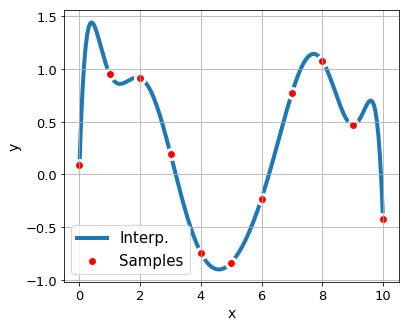

In [50]:
import numpy as np
import matplotlib.pyplot as plt

def poly(x, a):
    p = np.zeros_like(x)
    for i in range(len(a)):
        p += a[i] * x**i
    return p

def interp(x0, y0, x):
    n = len(x0)
    A = np.zeros((n, n))
    A[:, 0] = 1.
    for i in range(1, n):
        A[:, i] = x0**i
    a = np.linalg.solve(A, y0)
    return poly(x, a)

def plot_com(x0, y0, x, y, title=''):
    plt.figure(figsize=(6, 5))
    plt.scatter(x0, y0, s=100, facecolor='r', edgecolor='w',
                lw=3, label='Samples', zorder=1)
    plt.plot(x, y, lw=4, label='Interp.', zorder=0.5)
    plt.xlabel('x', fontsize=14); plt.ylabel('y', fontsize=14)
    plt.xticks(fontsize=13); plt.yticks(fontsize=13)
    plt.legend(fontsize=15)
    plt.title(title, fontsize=17); plt.grid(); plt.show()
    
def simple_plot(x, y, title=''):
    plt.figure(figsize=(6, 5))
    plt.plot(x, y, lw=4, zorder=0.5)
    plt.xlabel('x', fontsize=14); plt.ylabel('y', fontsize=14)
    plt.xticks(fontsize=13); plt.yticks(fontsize=13)
    plt.title(title, fontsize=17); plt.grid(); plt.show()
    
def main():
    n = 9; N = 201
    x0 = np.linspace(0, 10, 11)
    y0 = np.random.random(len(x0))*0.15 + np.sin(x0)
    x = np.linspace(min(x0), max(x0), N)
    y = interp(x0, y0, x)
    plot_com(x0, y0, x, y)

if __name__ == '__main__':
    main()

***
## **2. Lagrangian polynomials**
##### According to the definition of $\large{Lagrangian}$ polynomials, we have
$$
\large{
\begin{aligned}
    L_i(x) &= \prod_{k=0, k\not=i}^{N}\frac{x-x_k}{x_i-x_k}\\
    &= \frac{(x-x_0)(x-x_1)\cdots(x-x_{i-1})(x-x_{i+1})\cdots(x-x_N)}{(x_i-x_0)(x_i-x_1)\cdots(x_i-x_{i-1})(x_i-x_{i+1})\cdots(x_i-x_N)}
\end{aligned} \tag{2.1}.
}
$$
##### Here we constuct the polynomials
$$
\large{
    P_N(x) = \sum_{i=0}^Ny_iL_i(x) \tag{2.2}.
}
$$

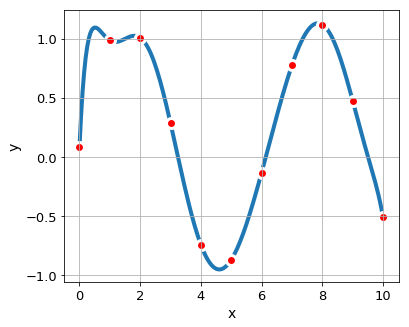

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def lag_interp(x0, y0, x):
    n = len(x0)
    p = np.ones((n, len(x)))
    for j in range(n):
        for i in range(n):
            if j != i:
                p[j] *= (x-x0[i])/(x0[j]-x0[i])
        p[j] *= y0[j]
    return sum(p)

def main():
    n = 9; N = 201
    x0 = np.linspace(0, 10, 11)
    y0 = np.random.random(len(x0))*0.15 + np.sin(x0)
    x = np.linspace(min(x0), max(x0), N)
    y = lag_interp(x0, y0, x)
    plot_com(x0, y0, x, y)
    
if __name__ == '__main__':
    main()

***
## **3. Newton polynomials**
##### We first give the $\large{Newton}$ polynomials
$$
\large{
\left \{
\begin{aligned}
    n_0(x) &= 1\\
    n_1(x) &= x-x_0\\
    n_2(x) &= (x-x_0)(x-x_1)\\
    &\vdots\\
    n_N(x) &= \prod_{k=0}^{N-1}(x-x_k)
\end{aligned}
\right. \tag{3.1},
}
$$
##### and the $\large{N_{th}-order}$ polynomials $\large{P_N(x)}$ is given by
$$
\large{
    P_N(x) = \sum_{i=0}^{N}a_in_i(x)
} \tag{3.2}.
$$
##### Notice that $\large{P_N(x_i)=y_i}$ yields
$$
\large{
\left [
\begin{matrix}
    1      &       0 & 0                  & \cdots & 0\\
    1      & x_1-x_0 & 0                  & \cdots & 0\\
    1      & x_2-x_0 & (x_2-x_1)(x_2-x_0) & \cdots & 0\\
    \vdots & \vdots  & \vdots             & \cdots & \vdots\\
    1      & x_N-x_0 & (x_N-x_1)(x_N-x_0) & \cdots & \prod_{i=0}^{N-1}(x_N-x_i)
\end{matrix}
\right ]
\left [
\begin{matrix}
    a_0\\
    a_1\\
    a_2\\
    \vdots\\
    a_N\\
\end{matrix}
\right ] =
\left [
\begin{matrix}
    y_0\\
    y_1\\
    y_2\\
    \vdots\\
    y_N
\end{matrix}
\right ] \tag{3.3}.
}
$$

##### The solutions of $\large{eq. \ (3.3)}$ are in forms,
$$
\large{
\left \{
\begin{aligned}
    a_0 &= y_0\\
    a_1 &= \frac{y_1-y_0}{x_1-x_0}\\
    a_2 &= (\frac{y_2-y_0}{x_2-x_0}-\frac{y_1-y_0}{x_1-x_0})/(x_2-x_1)=(\frac{y_2-y_1}{x_2-x_1}-\frac{y_1-y_0}{x_1-x_0})/(x_2-x_0)\\
    & \vdots
\end{aligned}
\right. \tag{3.4}.
}
$$
##### Here, we define the divided differences,
$$
\large{
\left \{
\begin{aligned}
    f[x_0] &= f(x_0)=y_0\\
    &\vdots\\
    f[x_k] &= f(x_k)=y_k\\
    f[x_{k-j},x_{k-j+1},\cdots,x_k] &= \frac{f[x_{k-j+1},x_{k-j+2},\cdots,x_k]-f[x_{k-j},x_{k-j+1},\cdots,x_{k-1}]}{x_k-x_{k-j}}\\
    a_k &= f[x_0,x_1,\cdots, x_k]
\end{aligned}
\right. \tag{3.5}.
}
$$

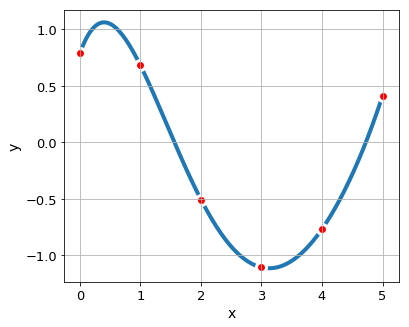

In [37]:
import numpy as np
from functools import reduce
import operator

class NewtonPolyInterp:
    '''
    Interpolation with Newton's polynomials method.
    '''
    # Constructor: receiving the given points.
    def __init__(self, points):
        self.__xy = points
    # Get the coefficients: ai (Calulating the difference quotients).
    def get_diff(self):
        x0 = self.__xy[:, 0]; y0 = self.__xy[:, 1]
        n = len(x0)               
        p = np.zeros((n, n+1))       
        p[:, 0] = x0; p[:, 1] = y0             
        for j in range(2, n+1):      
            p[j-1: n, j] = (p[j-1: n, j-1]-p[j-2: n-1, j-1]) / (x0[j-1: n]-x0[: n+1-j])
        q = np.diag(p, k=1)
        return p, q
    # Get the interpolated function.
    def evaluate(self, xx):
        _, q = self.get_diff()
        def polynomial(i):
            if i > 0:
                l_i = [(xx - self.__xy[j, 0]) for j in range(i)]
            else:
                l_i = [1]
            return reduce(operator.mul, l_i) * q[i]
        return sum(polynomial(i) for i in range(len(self.__xy[:, 0])))
    
# Get tested on given points.
def main():    
    N = 5
    p = np.empty((N+1, 2))
    # Given five points(k, cos(k), k=0, 1, 2, 3, 4)
    p[:, 0] = np.arange(N+1)
    p[:, 1] = np.cos(p[:, 0]) + np.random.randn(len(p[:, 0]))*0.25
    x1 = np.linspace(min(p[:, 0]), max(p[:, 0]), 201)
    inp = NewtonPolyInterp(p)
    y1 = inp.evaluate(x1)
    plot_com(p[:, 0], p[:, 1], x1, y1)
if __name__ == '__main__':
    main()

***
## **4. Runge's phenomenon**
##### The error will increase when we use polynomials with higher orders to interpolate given points, which is called $\large{Runge's \ phenomenon}$. Here we give an example $\large{f(x)=\frac{1}{1+12x^2}}$.

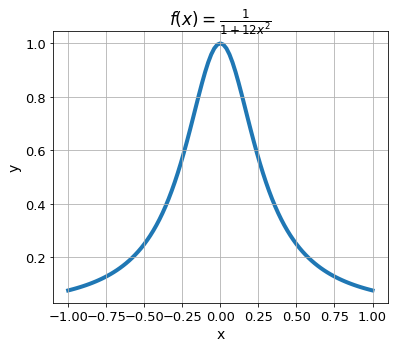

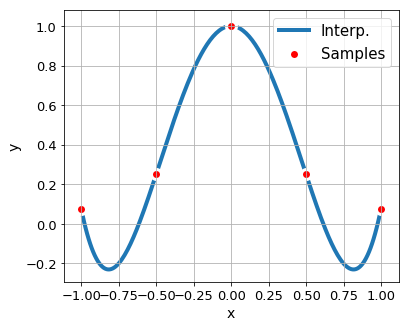

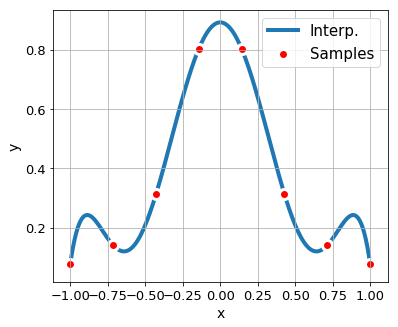

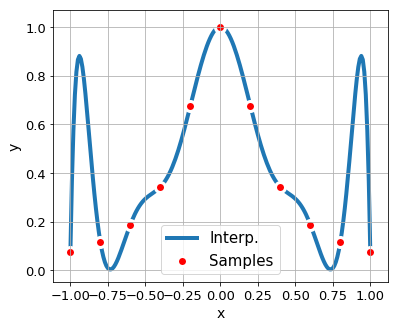

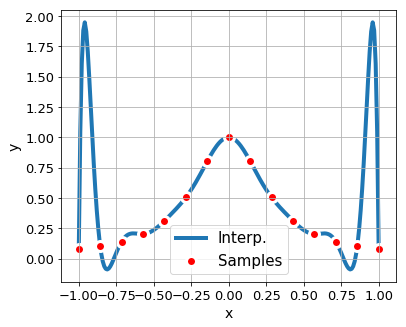

In [52]:
def main():
    n = [5, 8, 11, 15]
    x = np.linspace(-1, 1, 101)
    y = 1 / (1+12*x**2)
    simple_plot(x, y, title=r'$f(x)=\frac{1}{1+12x^2}$')
    for nn in n:
        x0 = np.linspace(-1, 1, nn)
        y0 = 1 / (1+12*x0**2)
        x = np.linspace(min(x0), max(x0), 201)
        y = lag_interp(x0, y0, x)
        plot_com(x0, y0, x, y)
if __name__ == '__main__':
    main()

***
## **5. Chebyshev cotes and Chebyshev polynomials**
##### The $\large{Chebyshev \ polynomials}$ are given by
$$
\large{
\left \{
\begin{aligned}
    T_0(x) &= 1\\
    T_1(x) &= x\\
    T_{n+1}(x) & = 2xT_{n}(x)-T_{n-1}(x), n \ge 1\\
    T_n(cos\theta) &= cos(n\theta)
\end{aligned}
\right. \tag{5.1}.
}
$$
##### $\large{Chebyshev \ cotes}$ can decrease the error, and we define these cotes as
$$
\large{
    x_k = cos(\frac{(2k+1)\pi}{2N}), k=0, 1, 2, \cdots, N-1
} \tag{5.2}.
$$

In [57]:
import numpy as np


def plot_chebyshev(x, n, title=''):
    tn = np.zeros((n, len(x)));
    tn[0] = np.ones_like(x)
    tn[1] = x
    plt.figure(figsize=(8, 5))
    plt.plot(x, tn[0], lw=3, label='degree=%d'%0)
    plt.plot(x, tn[1], lw=3, label='degree=%d'%1)
    for i in range(2, n+1):
        y = 2*x*tn[1] - tn[0]
        plt.plot(x, tn[1], lw=3, label='degree=%d'%i)
        tn[0] = tn[1]; tn[1] = y
    plt.xlabel('x', fontsize=14); plt.ylabel('Tn', fontsize=14)
    plt.xticks(fontsize=13); plt.yticks(fontsize=13)
    plt.legend(fontsize=12)
    plt.title(title, fontsize=15); plt.grid(); plt.show()
class ChebyshevInterp:
    '''
    Interpolation with Chebyshev polynomial mathod.
    '''
    # Constructor: Get given points.
    def __init__(self, points):
        self.__xy = points
    # Chebyshev polynomials of degree N on "x". 
    def Tn(self, N, x):
        n = len(x)
        if N == 0:
            return np.ones(n)
        elif N == 1:
            return x
        else:
            return 2*x*self.Tn(N-1, x) - self.Tn(N-2, x)
    # Evaluate the interpolated function.
    def evaluate(self, N, x, cof=False):
        p = np.zeros_like(x)
        x0 = self.__xy[:, 0]; y0 = self.__xy[:, 1]
        c = np.empty(N+1)
        for i in range(N+1):
            if i == 0:
                c[i] = sum(y0)/(N+1)
            else:
                c[i] = 2/(N+1)*sum(y0*self.Tn(i, x0))
            p += c[i]*self.Tn(i, x)
        if cof:
            [print('c%d = %12.8f'%(i, c[i])) for i, c[i] in enumerate(c)]
        return p

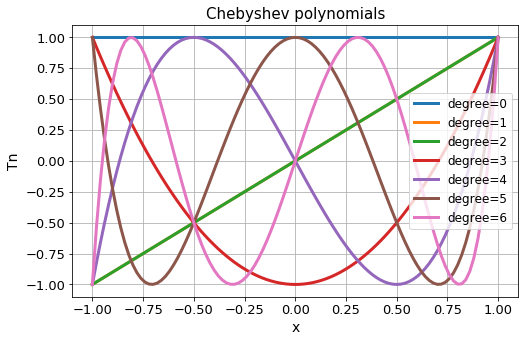

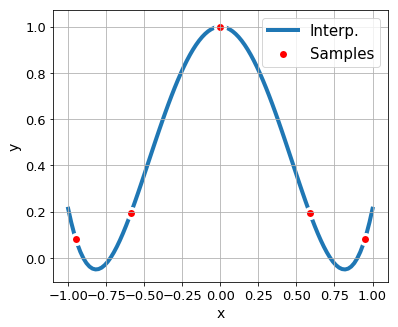

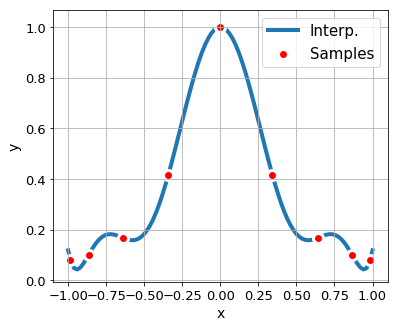

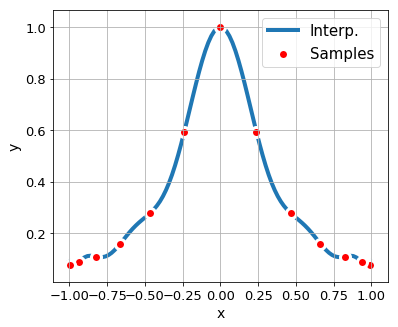

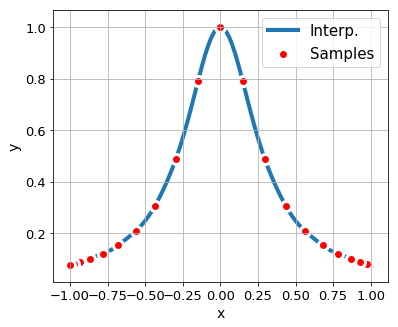

In [65]:
def main():
    x = np.linspace(-1, 1, 101); n = 6
    plot_chebyshev(x, n, title='Chebyshev polynomials')
    
    n = [5, 9, 13, 21]
    for ni in n:
        nn = np.arange(ni)
        x0 = np.cos((2*nn+1)*np.pi/2/ni); y0 = 1 / (1+12*x0**2)
        x = np.linspace(-1, 1, 101)
        y = lag_interp(x0, y0, x)
        plot_com(x0, y0, x, y)

if __name__ == '__main__':
    main()